Question 1: What is Simple Linear Regression?

ANswer
Simple Linear Regression is a statistical method to study the relationship between two variable:

**Independent Variable(X)** :- The predict/input.

**Dependent Variable(y) :- The output we want to predict.

Relation between X and y is linear :-
y = mx+c

Question 2: What are the key assumptions of Simple Linear Regression?
key assumptions of Simple Linear Regression are the following:-

1. Linearity :- Both X and Y have linear relationship.
2. Independence of errors
3. Homoscedasticity :- The variance of the residuals is constant across all values of X.
4. Normality of errors :- The residual should be normally distributed.
5. No significant outliers:- outliers can influence regression line.


Question 3: What is heteroscedasticity, and why is it important to address in regression
models?

It occurs when the variance of the residuals (errors) is not constant across all values of the independent variable(s).
In other words, unequal spread of errors.

Why it is important

**Violates regression assumptions** :-

Simple Linear Regression assumes homoscedasticity (constant error variance).

If violated, standard errors of coefficients are biased.

**Leads to unreliable hypothesis testing** :-

p-values, t-tests, and confidence intervals become invalid.

You may wrongly conclude a variable is significant (Type I error) or insignificant (Type II error).

Affects model efficiency

Estimates of coefficients (
𝛽
0
,
𝛽
1
β
0
	​,β
1
	) are still unbiased (OLS property), but they are no longer efficient (not minimum variance).

Question 4: What is Multiple Linear Regression?


Multiple linear regression uses multiple independent variables(X) to predict the output(dependent variable)(Y).

Y=β0​+β1​X1​+β2​X2​+⋯+βn​Xn​+ϵ

where,
Y = dependent variable

X1, X2, X3, .... XN = independent variable

𝛽
0
= intercept





It helps to capture complex relationship with multiple factors.



Question 5: What is polynomial regression, and how does it differ from linear
regression?

Polynomial regression helps to capture the non-linear relationships using curves instead of straight line.

Polynomial Regression is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an nth degree polynomial.



how does it differ from linear regression?

Shape- linear shape in linear regression while curved line in polynomial regression.

complexity :- simple and easy to interpretat in linear regression and complexity even risk of overfitting if degree is high in polynomial regression.






In [8]:
"""Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]
df = pd.DataFrame({'X':X,'Y':Y})
df.head()

,X,Y
0,1,2.1
1,2,4.3
2,3,6.1
3,4,7.9
4,5,10.2


In [5]:
#train-test split
from sklearn.model_selection import train_test_split

x = df[['X']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#modeltraining

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(y_pred)

print(lr.coef_)
print(lr.intercept_)

(4, 1) (1, 1) (4,) (1,)
[6.125]
[1.98]
0.1849999999999996


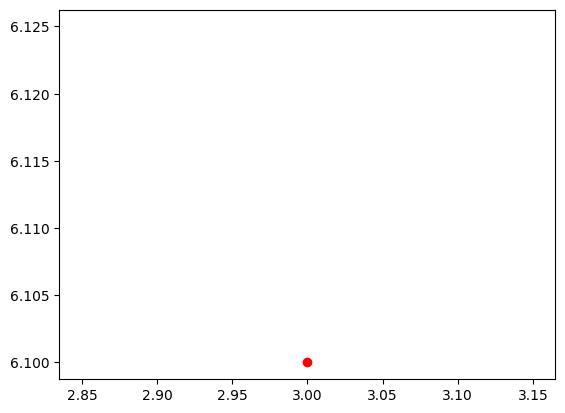

In [14]:
#Plot the regression line over the data points


plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.show()

In [18]:
"""Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)"""
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

df1 = pd.DataFrame({'Area':Area,'Rooms':Rooms,'Price':Price})
df1.head()


,Area,Rooms,Price
0,1200,2,250000
1,1500,3,300000
2,1800,3,320000
3,2000,4,370000


In [19]:
x = df1[['Area', 'Rooms']]
y = df1['Price']

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size= 0.2, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3, 2) (1, 2) (3,) (1,)


In [17]:
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
print(y_pred2)



[363333.33333333]


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df1.columns

[variance_inflation_factor(df1.values , i) for i in range(len(df1.columns))]


[np.float64(382.7376164786625),
 np.float64(130.62383521334078),
 np.float64(312.24865129965906)]

In [25]:
"""Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.
(Include your Python code and output in the code box below.)
"""
X1 = [1, 2, 3, 4, 5]
Y1 = [2.2, 4.8, 7.5, 11.2, 14.7]

df2 = pd.DataFrame({'X1':X1, 'Y1':Y1})
print(df2.head())

# Convert lists to NumPy arrays before splitting
X1_np = np.array(X1).reshape(-1, 1)
Y1_np = np.array(Y1)

X_train, X_test, y_train, y_test = train_test_split(X1_np, Y1_np,test_size= 0.2, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

   X1    Y1
0   1   2.2
1   2   4.8
2   3   7.5
3   4  11.2
4   5  14.7
(4, 1) (1, 1) (4,) (1,)


Predicted values on test data: [7.85]


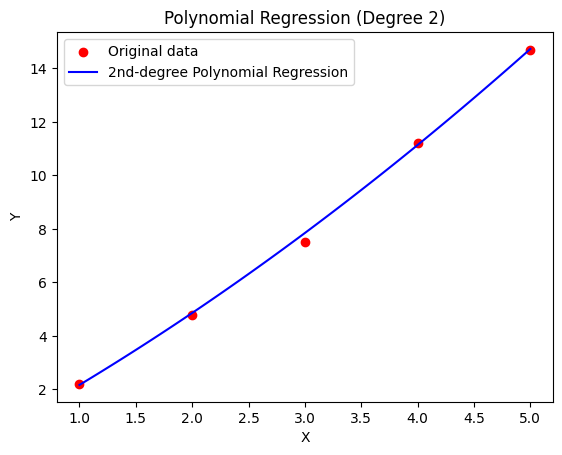

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

# Predict on the test data
y_pred_poly = poly_reg_model.predict(X_test_poly)
print("Predicted values on test data:", y_pred_poly)

# Plot the original data and the polynomial regression curve
plt.scatter(X1, Y1, color='red', label='Original data')

# Generate points for the smooth curve
X_plot = np.linspace(min(X1), max(X1), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = poly_reg_model.predict(X_plot_poly)

plt.plot(X_plot, y_plot, color='blue', label='2nd-degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

   X2  Y2
0  10  15
1  20  35
2  30  40
3  40  50
4  50  65
(4, 1) (1, 1) (4, 1) (1, 1)
y_pred is [[41.25]]
[[-1.25]]


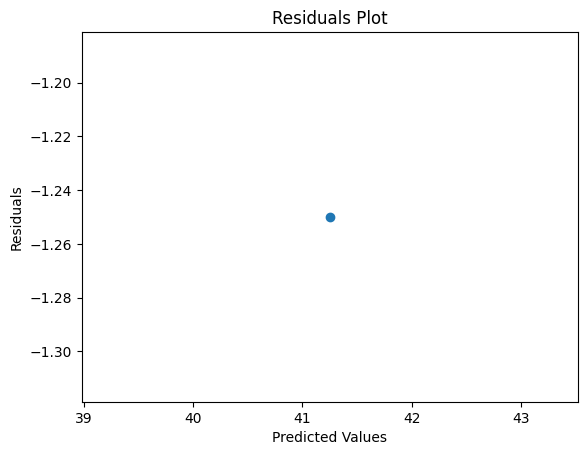

In [29]:
"""Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
(Include your Python code and output in the code box below.)"""

X2 = [10, 20, 30, 40, 50]
Y2 = [15, 35, 40, 50, 65]

df3 = pd.DataFrame({'X2':X2, 'Y2':Y2})
print(df3.head())

x2_np = np.array(X2).reshape(-1, 1)
y2_np = np.array(Y2).reshape(-1, 1)

#train_test split

X_train, X_test, y_train, y_test = train_test_split(x2_np, y2_np,test_size= 0.2, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#train the model

lr.fit(X_train, y_train)


#predict
y_pred = lr.predict(X_test)
print((f'y_pred is {y_pred}'))

#calculate residuals
residuals = y_test -y_pred
print(residuals)


#plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()








In [ ]:
"""Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model."""

""" Problems :- heteroscedasticity and multicollinearity

1. Fix Heteroscedasticity :- Use log transformation on the price

code:-
df['log_price'] = np.log(df['price'])


This makes the spread of errors more even.

2. Fix Multicollinearity
a. Check for similar features, like area and number of rooms.
b. Keep only one, or combine them.
c.Or use Ridge or Lasso regression, which handles this automatically.

code:-
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
